<a href="https://colab.research.google.com/github/yashjain-99/Projects/blob/main/Cat_VS_dog_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates Classification between Cat and Dog using Tensorflow.

--Yash Jain

--https://github.com/yashjain-99

--https://linkedin.com/in/yash-jain-80ba02196

In [1]:
!gdown --id https://drive.google.com/file/d/1FYjtUcLJPCZRcuSQyeV_bAVly2mlo8fb/view?usp=sharing
#gdown won't work kindly download and upload manually

Permission denied: https://drive.google.com/uc?id=https://drive.google.com/file/d/1FYjtUcLJPCZRcuSQyeV_bAVly2mlo8fb/view?usp=sharing
Maybe you need to change permission over 'Anyone with the link'?


Importing and extracting DataSet

In [2]:
import os
import zipfile
import tensorflow as tf
from PIL import Image
local_zip='/content/drive/MyDrive/test_set.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./test_set')
zip_ref.close()

In [3]:
import cv2
im = cv2.imread('/content/test_set/test_set/dogs/dog.4001.jpg')
print(type(im))
print(im.shape)
print(type(im.shape))

<class 'numpy.ndarray'>
(499, 421, 3)
<class 'tuple'>


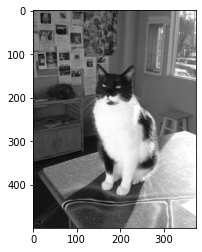

[[ 77  75  95 ... 200 198 255]
 [100 102 103 ... 198 203 253]
 [100 108  98 ... 185 199 243]
 ...
 [ 33  34  35 ... 192 205 189]
 [ 37  38  39 ... 195 208 192]
 [ 40  41  42 ... 196 209 193]]


In [4]:
import matplotlib.pyplot as plt
DATADIR = './test_set/test_set/'
CATEGORIES = ["cats", "dogs"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show() 
        break  
    break 
print(img_array)

Defining Model

In [5]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Cat') and 1 for the other ('Dog')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

Model configuration

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Using ImageDataGenerator for creating Training Data and validation Data

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './test_set/test_set/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './test_set/test_set/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2023 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=25,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
      callbacks=[callbacks])

Epoch 1/25
8/8 [==============================] - 14s 1s/step - loss: 0.6960 - accuracy: 0.5035 - val_loss: 0.6923 - val_accuracy: 0.5234
Epoch 2/25
8/8 [==============================] - 9s 1s/step - loss: 0.6926 - accuracy: 0.5283 - val_loss: 0.6876 - val_accuracy: 0.5391
Epoch 3/25
8/8 [==============================] - 7s 810ms/step - loss: 0.6920 - accuracy: 0.5020 - val_loss: 0.6902 - val_accuracy: 0.5078
Epoch 4/25
8/8 [==============================] - 6s 783ms/step - loss: 0.6872 - accuracy: 0.5746 - val_loss: 0.7094 - val_accuracy: 0.4531
Epoch 5/25
8/8 [==============================] - 6s 773ms/step - loss: 0.6778 - accuracy: 0.5666 - val_loss: 0.6490 - val_accuracy: 0.6719
Epoch 6/25
8/8 [==============================] - 6s 770ms/step - loss: 0.6571 - accuracy: 0.6056 - val_loss: 0.6557 - val_accuracy: 0.6445
Epoch 7/25
8/8 [==============================] - 6s 778ms/step - loss: 0.6792 - accuracy: 0.5626 - val_loss: 0.6864 - val_accuracy: 0.5469
Epoch 8/25
8/8 [=========

Got accuracy of 88% can be improved

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving GettyImages-1204183728-e1608325666832.jpg to GettyImages-1204183728-e1608325666832.jpg
[1.]
GettyImages-1204183728-e1608325666832.jpg is a dog


In [11]:
# import signal
# import os
# os.kill(os.getpid(), signal.SIGKILL)